In [50]:
# polynomial regression using normal equation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/6_deg_reg.xlsx')

x_train = data['x'].values
y_train = data['y'].values

In [51]:
# set the degree of the polynomial
degree = 6

In [52]:
# create input matrix
X = np.ones((len(x_train), degree + 1))
for i in range(1, degree + 1):
    X[:, i] = x_train ** i

X.shape

(36, 7)

In [53]:
# use normal equation to solve for theta
theta = np.linalg.inv(X.T @ X) @ X.T @ y_train
theta

array([  157.02375686,  -982.75771469,  2397.48869184, -2911.38579215,
        1872.07651719,  -609.63357914,    79.13476635])

In [54]:
# print equation
print('y = %.2f' % theta[0], end='')
for i in range(1, len(theta)):
    print(' + %.2fx^%d' % (theta[i], i), end='')

y = 157.02 + -982.76x^1 + 2397.49x^2 + -2911.39x^3 + 1872.08x^4 + -609.63x^5 + 79.13x^6

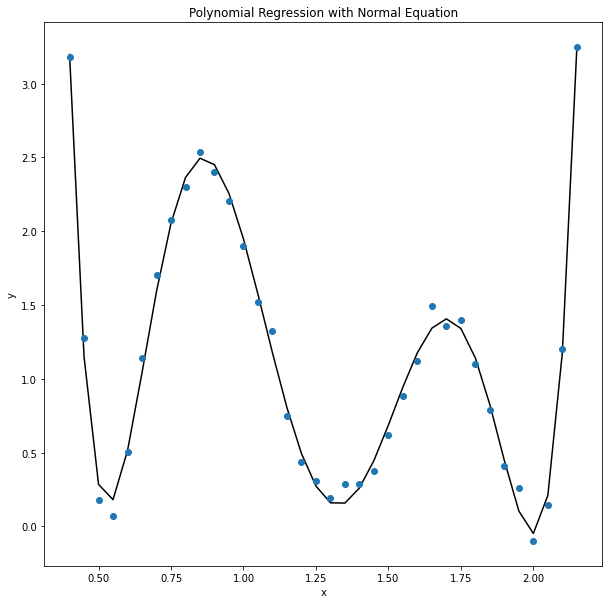

In [55]:
# plot results
plt.figure(figsize=(10, 10))
plt.title('Polynomial Regression with Normal Equation')
plt.xlabel('x')
plt.ylabel('y')

y_pred = X @ theta
plt.plot(x_train, y_pred, 'k-')
plt.plot(x_train, y_train, 'o')

plt.show()